In [7]:
library(wendy)
library(deSolve)

In [15]:
f <- function(u, p, t) {
  c(p[1] * u[1] - p[2] * u[1]^2)
}

p_star <- c(1, 1);
u0 <- c(0.01);
p0 <- c(0.5, -0.5);
npoints <- 256
t_span <- c(0.005, 10);
t_eval <- seq(t_span[1], t_span[2], length.out = npoints);

modelODE <- function(tvec, state, parameters) { list(as.vector(f(state, parameters, tvec))) }
sol <- deSolve::ode(y = u0, times = t_eval, func = modelODE, parms = p_star)

In [16]:
# Additive Gaussian Noise
nr <- 0.15
U_vec <- as.vector(sol[,-1])
noise_sd <- nr * sqrt(mean(U_vec^2))
U <- matrix(c(sol[, 2] + rnorm(npoints, mean = 0, sd = noise_sd)), ncol = 1)
tt <- sol[, 1, drop = FALSE]

In [17]:
res <- solveWendy(f, p0, U, tt, lip = TRUE, method = "MLE")

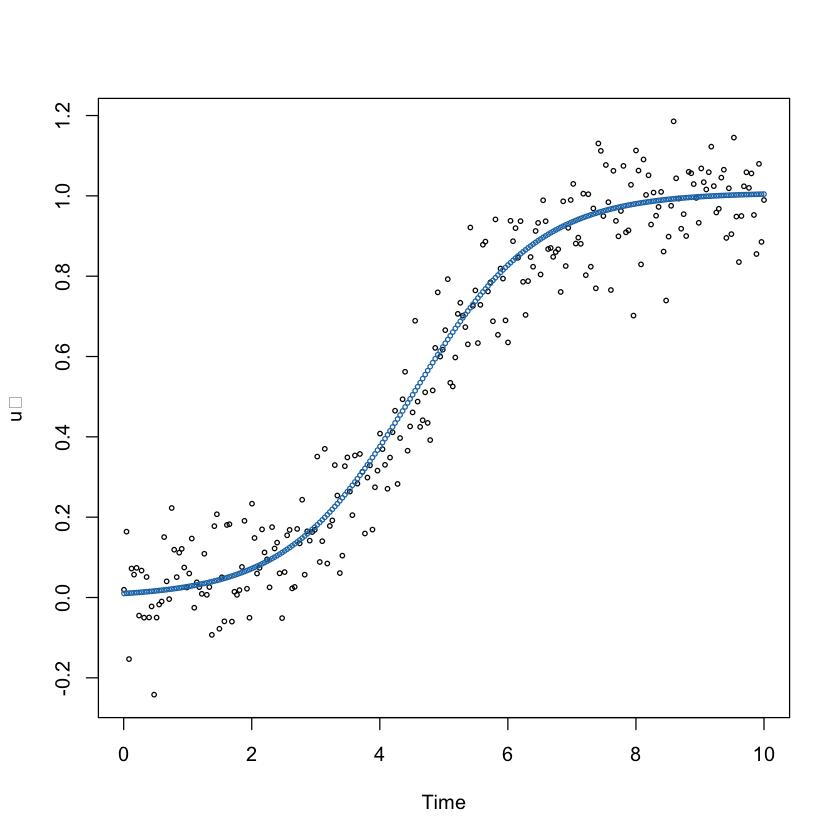

In [18]:
sol_hat <- deSolve::ode(u0, t_eval, modelODE, res$phat)

plot(tt, U, cex = 0.5, xlab = "Time", ylab=  "u₁")
points(tt, sol_hat[,2], cex = 0.5, col = "#1f77b4")

In [19]:
res$phat

[1] 1.021785 1.013628